In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Deep learning
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Input,
    BatchNormalization, Activation, SeparableConv2D
)

# Utilities
import os
import gc
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')


# print all classes

In [2]:
for cat in os.listdir("/kaggle/input/food41/images"):
    print(cat)
categories = os.listdir("/kaggle/input/food41/images")
print(len(categories))

macarons
french_toast
lobster_bisque
prime_rib
pork_chop
guacamole
baby_back_ribs
mussels
beef_carpaccio
poutine
hot_and_sour_soup
seaweed_salad
foie_gras
dumplings
peking_duck
takoyaki
bibimbap
falafel
pulled_pork_sandwich
lobster_roll_sandwich
carrot_cake
beet_salad
panna_cotta
donuts
red_velvet_cake
grilled_cheese_sandwich
cannoli
spring_rolls
shrimp_and_grits
clam_chowder
omelette
fried_calamari
caprese_salad
oysters
scallops
ramen
grilled_salmon
croque_madame
filet_mignon
hamburger
spaghetti_carbonara
miso_soup
bread_pudding
lasagna
crab_cakes
cheesecake
spaghetti_bolognese
cup_cakes
creme_brulee
waffles
fish_and_chips
paella
macaroni_and_cheese
chocolate_mousse
ravioli
chicken_curry
caesar_salad
nachos
tiramisu
frozen_yogurt
ice_cream
risotto
club_sandwich
strawberry_shortcake
steak
churros
garlic_bread
baklava
bruschetta
hummus
chicken_wings
greek_salad
tuna_tartare
chocolate_cake
gyoza
eggs_benedict
deviled_eggs
samosa
sushi
breakfast_burrito
ceviche
beef_tartare
apple_pie
huev

In [6]:
categories = [
    "ice_cream", "waffles", "falafel","sushi", "hot_dog", "pizza", "donuts", "hamburger"
]

In [4]:
data = []
labels = []
path = "/kaggle/input/food41/images"

for index, cat in enumerate(categories):
    cat_path = os.path.join(path, cat)
    
    print(f"Loading category: {cat}...")
    for img_name in tqdm(os.listdir(cat_path), desc=f"{cat:15}"):
        img_path = os.path.join(cat_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # save RGB not BGR
            img = cv2.resize(img, (224, 224))           # Resize for VGG
            data.append(img)
            labels.append(index)

Loading category: ice_cream...


ice_cream      : 100%|██████████| 1000/1000 [00:14<00:00, 69.04it/s]


Loading category: waffles...


waffles        : 100%|██████████| 1000/1000 [00:13<00:00, 72.47it/s]


Loading category: falafel...


falafel        : 100%|██████████| 1000/1000 [00:14<00:00, 70.20it/s]


Loading category: sushi...


sushi          : 100%|██████████| 1000/1000 [00:13<00:00, 72.85it/s]


Loading category: hot_dog...


hot_dog        : 100%|██████████| 1000/1000 [00:14<00:00, 70.86it/s]


Loading category: pizza...


pizza          : 100%|██████████| 1000/1000 [00:14<00:00, 69.48it/s]


Loading category: donuts...


donuts         : 100%|██████████| 1000/1000 [00:14<00:00, 68.62it/s]


Loading category: hamburger...


hamburger      : 100%|██████████| 1000/1000 [00:14<00:00, 69.29it/s]


In [6]:
# with open("data.pkl", "wb") as f:
#     pickle.dump(data, f)

# with open("labels.pkl", "wb") as f:
#     pickle.dump(labels, f)

In [5]:
# os.remove("data.pkl")
# os.remove("labels.pkl")

In [7]:
with open('/kaggle/working/data.pkl', 'rb') as f:
    data = pickle.load(f)

with open('/kaggle/working/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [8]:
X = np.array(data)
y = np.array(labels)

In [9]:
X_norm = np.array(data, dtype='float32') / 255.0

In [10]:
print(X.shape)
print(y.shape)

(8000, 224, 224, 3)
(8000,)


In [11]:
X[0]

array([[[  7,   7,   8],
        [ 12,  15,  22],
        [ 32,  39,  56],
        ...,
        [  8,   7,   3],
        [  8,   7,   3],
        [  8,   7,   3]],

       [[  9,   7,   8],
        [ 11,  11,  19],
        [ 23,  30,  47],
        ...,
        [  8,   7,   3],
        [  9,   8,   4],
        [  9,   8,   4]],

       [[ 12,   5,   7],
        [ 12,   9,  16],
        [ 18,  20,  36],
        ...,
        [  9,   8,   4],
        [ 10,   9,   5],
        [ 11,  10,   6]],

       ...,

       [[ 56,  33,  27],
        [ 45,  25,  18],
        [ 37,  18,  12],
        ...,
        [245, 214, 191],
        [245, 214, 190],
        [246, 215, 189]],

       [[ 50,  27,  20],
        [ 42,  21,  16],
        [ 37,  18,  13],
        ...,
        [245, 210, 190],
        [248, 213, 190],
        [246, 212, 187]],

       [[ 49,  25,  21],
        [ 34,  13,   8],
        [ 28,   9,   6],
        ...,
        [224, 187, 168],
        [228, 192, 171],
        [225, 189, 165]]

In [12]:
X_norm[0]

array([[[0.02745098, 0.02745098, 0.03137255],
        [0.04705882, 0.05882353, 0.08627451],
        [0.1254902 , 0.15294118, 0.21960784],
        ...,
        [0.03137255, 0.02745098, 0.01176471],
        [0.03137255, 0.02745098, 0.01176471],
        [0.03137255, 0.02745098, 0.01176471]],

       [[0.03529412, 0.02745098, 0.03137255],
        [0.04313726, 0.04313726, 0.07450981],
        [0.09019608, 0.11764706, 0.18431373],
        ...,
        [0.03137255, 0.02745098, 0.01176471],
        [0.03529412, 0.03137255, 0.01568628],
        [0.03529412, 0.03137255, 0.01568628]],

       [[0.04705882, 0.01960784, 0.02745098],
        [0.04705882, 0.03529412, 0.0627451 ],
        [0.07058824, 0.07843138, 0.14117648],
        ...,
        [0.03529412, 0.03137255, 0.01568628],
        [0.03921569, 0.03529412, 0.01960784],
        [0.04313726, 0.03921569, 0.02352941]],

       ...,

       [[0.21960784, 0.12941177, 0.10588235],
        [0.1764706 , 0.09803922, 0.07058824],
        [0.14509805, 0

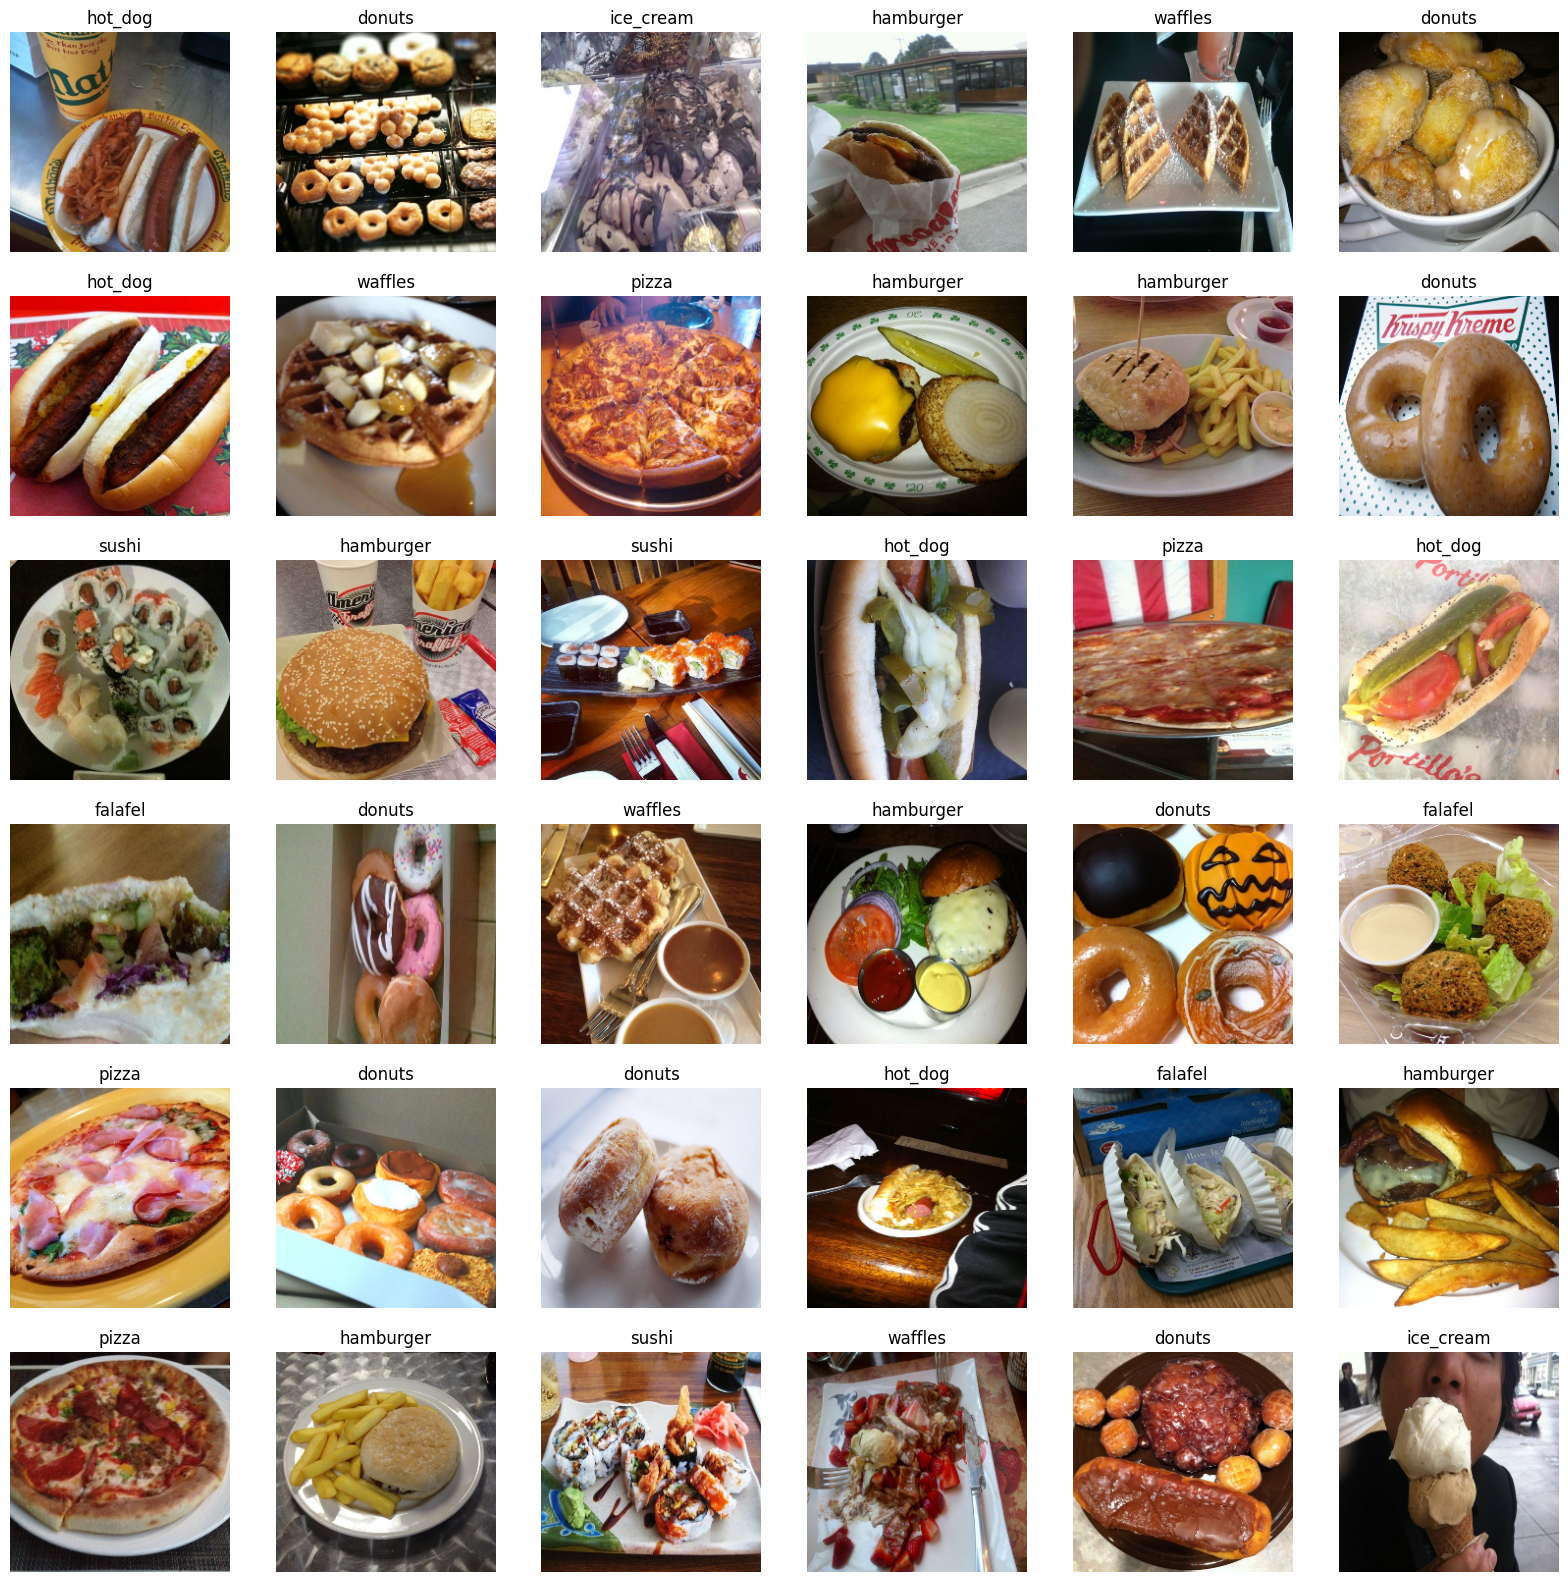

In [12]:
plt.figure(figsize=(20, 20))

for n, i in enumerate(list(np.random.randint(0, len(X_norm), 36))):
    plt.subplot(6, 6, n + 1)             # Create a 6x6 grid of subplots
    plt.imshow(X[i])                     # Show the image at index i
    plt.axis('off')
    plt.title(categories[y[i]])  

In [13]:
gc.collect()
tf.keras.backend.clear_session()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, stratify=y, random_state=42)

# Model 1 -> DNN

In [11]:
model_DNN = Sequential([
    Input(shape=(224, 224, 3)),
    
    # Initial feature extraction
    Conv2D(32, (3, 3),  kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # Block 2: Increased feature maps
    Conv2D(64, (3, 3), kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 3: Depthwise separable convolutions for efficiency
    SeparableConv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    SeparableConv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Block 4: Deep features with separable convolutions
    SeparableConv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    SeparableConv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),
    
    # Global pooling
    GlobalAveragePooling2D(),
    
    # Classification head with gradual dimension reduction
    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    
    Dense(8, activation='softmax')  # Changed to 8 classes as per your requirement
])

In [13]:
model_DNN.compile(
    optimizer=Adam(learning_rate=0.0003), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model_DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 220, 220, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 220, 220, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 108, 108, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 106, 106, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 106, 106, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 51, 51, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 51, 51, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 49, 49, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 49, 49, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 299,496 (1.14 MB)

 Trainable params: 296,808 (1.13 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [15]:
gc.collect()
model_DNN.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.1, shuffle=True)

Epoch 1/30


I0000 00:00:1752179353.890443    7810 service.cc:148] XLA service 0x7affd00a6c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752179353.892424    7810 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752179353.892448    7810 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752179355.105637    7810 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/180 ━━━━━━━━━━━━━━━━━━━━ 1:38:40 33s/step - accuracy: 0.0312 - loss: 3.3272

I0000 00:00:1752179375.571859    7810 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - accuracy: 0.1535 - loss: 2.9368 - val_accuracy: 0.1250 - val_loss: 2.6453
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.2181 - loss: 2.6642 - val_accuracy: 0.1125 - val_loss: 2.6690
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.2631 - loss: 2.5289 - val_accuracy: 0.1750 - val_loss: 2.6420
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.2838 - loss: 2.4108 - val_accuracy: 0.2875 - val_loss: 2.3510
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.3287 - loss: 2.3214 - val_accuracy: 0.3031 - val_loss: 2.3580
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 136ms/step - accuracy: 0.3371 - loss: 2.2384 - val_accuracy: 0.3313 - val_loss: 2.4695
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 136ms/step - accuracy: 0.3742 - loss: 2.1993 - val_accuracy: 0.4016 - val_loss: 2.0376
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.4244 - loss: 2.0606 - val

# Evaluate Model on Test/Validation Data

In [57]:
def evaluate_model(model, X_test, y_test, categories=None):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # Model evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return y_test, y_pred, y_pred_probs

In [21]:
y_test, y_pred, y_pred_probs = evaluate_model(model_DNN,X_test,y_test,categories)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Test Loss: 1.4962
Test Accuracy: 0.5681


# Confusion Matrix


In [58]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    # Normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=categories, yticklabels=categories,
                cbar_kws={'label': 'Percentage'})
    plt.title('Normalized Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return cm

<Figure size 1000x800 with 0 Axes>

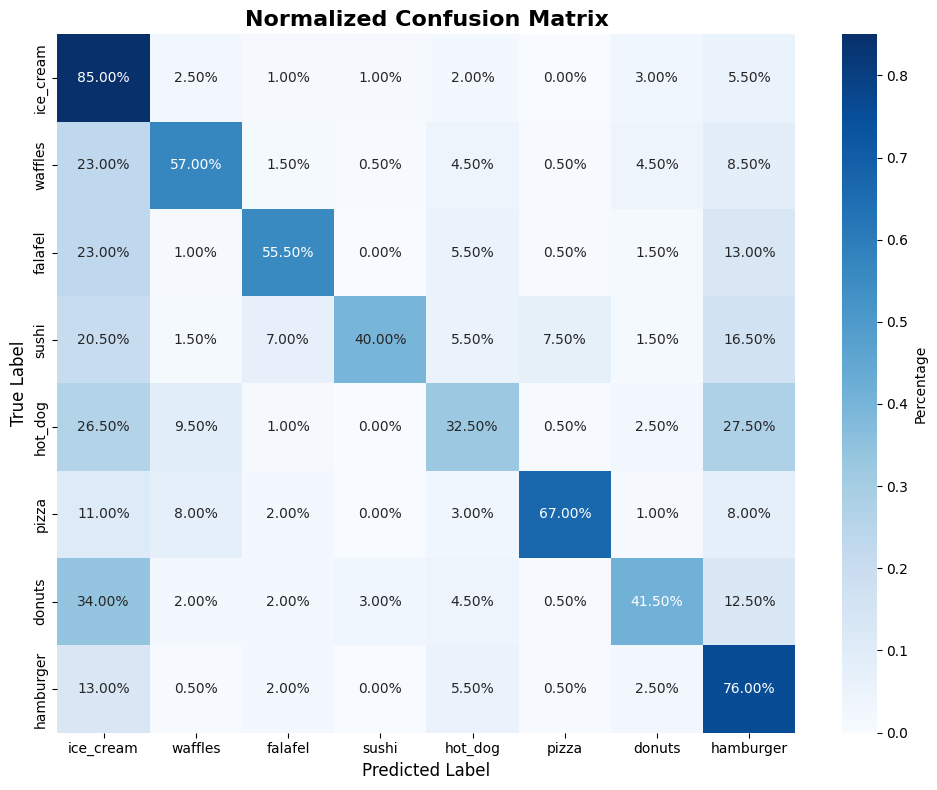

In [32]:
cm = plot_confusion_matrix(y_test,y_pred)

# Classification Report

In [59]:
def generate_classification_report(y_true, y_pred):
    
    report = classification_report(y_true, y_pred, target_names=categories)
    print("\nClassification Report:")
    print("=" * 60)
    print(report)
    
    # Create DataFrame for visualization
    report_dict = classification_report(y_true, y_pred, target_names=categories, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    
    # Plot classification metrics
    metrics_df = df_report.iloc[:-3, :-1]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    metrics_df.plot(kind='bar', ax=ax)
    plt.title('Classification Metrics by Class', fontsize=16, fontweight='bold')
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend(['Precision', 'Recall', 'F1-Score'])
    plt.xticks(rotation=45)
    plt.ylim(0, 1.0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    return df_report


Classification Report:
              precision    recall  f1-score   support

   ice_cream       0.36      0.85      0.51       200
     waffles       0.70      0.57      0.63       200
     falafel       0.77      0.56      0.65       200
       sushi       0.90      0.40      0.55       200
     hot_dog       0.52      0.33      0.40       200
       pizza       0.87      0.67      0.76       200
      donuts       0.72      0.41      0.53       200
   hamburger       0.45      0.76      0.57       200

    accuracy                           0.57      1600
   macro avg       0.66      0.57      0.57      1600
weighted avg       0.66      0.57      0.57      1600



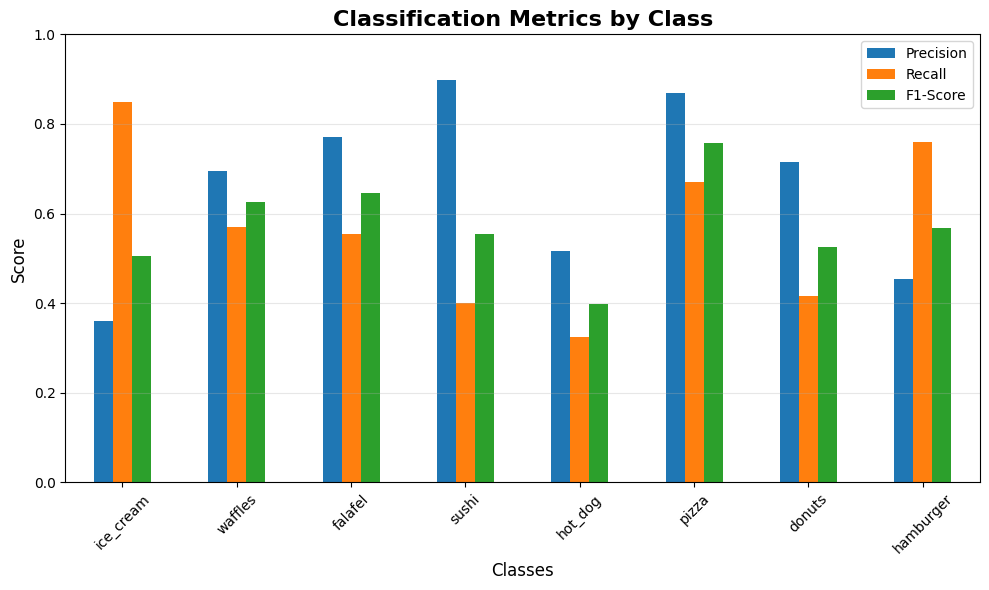

In [34]:
df_report = generate_classification_report(y_test,y_pred)

In [64]:
def plot_per_class_metrics(cm):
    per_class_accuracy = np.diag(cm) / cm.sum(axis=1)
    per_class_precision = np.diag(cm) / cm.sum(axis=0)
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Accuracy bar plot
    bars1 = ax1.bar(range(len(per_class_accuracy)), per_class_accuracy)
    ax1.set_xlabel('Classes', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_title('Per-Class Accuracy', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(categories)))
    ax1.set_xticklabels(categories, rotation=45)
    ax1.set_ylim(0, 1.0)
    
    # Color bars based on performance
    for i, bar in enumerate(bars1):
        if per_class_accuracy[i] < 0.5:
            bar.set_color('red')
        elif per_class_accuracy[i] < 0.7:
            bar.set_color('orange')
        else:
            bar.set_color('green')
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{per_class_accuracy[i]:.2f}', ha='center', va='bottom')
    
    # Precision bar plot
    bars2 = ax2.bar(range(len(per_class_precision)), per_class_precision)
    ax2.set_xlabel('Classes', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Per-Class Precision', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(categories)))
    ax2.set_xticklabels(categories, rotation=45)
    ax2.set_ylim(0, 1.0)
    
    # Color bars based on performance
    for i, bar in enumerate(bars2):
        if per_class_precision[i] < 0.5:
            bar.set_color('red')
        elif per_class_precision[i] < 0.7:
            bar.set_color('orange')
        else:
            bar.set_color('green')
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{per_class_precision[i]:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

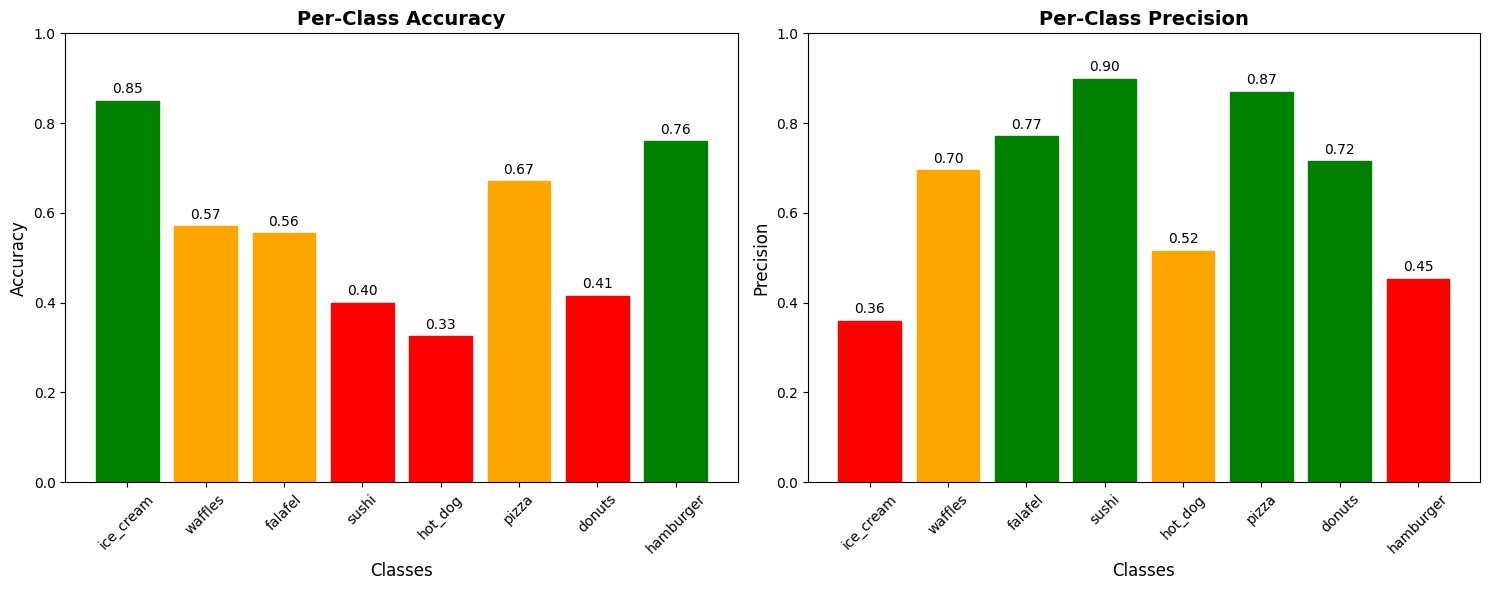

In [39]:
plot_per_class_metrics(cm)

# Clear memory first

In [22]:
gc.collect()
tf.keras.backend.clear_session()

# VGG16 Model

In [16]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg16_base.layers[:-4]:  # Keep last 4 layers trainable
    layer.trainable = False

I0000 00:00:1752189405.546933   11255 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752189405.547692   11255 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [17]:
vgg16_model1 = Sequential([
        vgg16_base,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(8, activation='softmax')
    ])

In [18]:
vgg16_model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
print("Model Summary:")
vgg16_model1.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,096 (56.64 MB)

 Trainable params: 7,213,320 (27.52 MB)

 Non-trainable params: 7,635,776 (29.13 MB)

# Callbacks

In [21]:
callbacks1 = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        'best_vgg16_model_v2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [23]:
vgg16_history1 = vgg16_model1.fit(
    X_train, y_train, batch_size=32,
    epochs=15,
    callbacks=callbacks1,
    validation_split = 0.1
)

Epoch 1/15


I0000 00:00:1752189477.359572   11289 service.cc:148] XLA service 0x7a4d100116d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752189477.361291   11289 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752189477.361318   11289 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752189477.943030   11289 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/180 ━━━━━━━━━━━━━━━━━━━━ 55:45 19s/step - accuracy: 0.0312 - loss: 2.6917

I0000 00:00:1752189492.480187   11289 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3295 - loss: 1.8919
Epoch 1: val_accuracy improved from -inf to 0.23906, saving model to best_vgg16_model_v2.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 61s 236ms/step - accuracy: 0.3300 - loss: 1.8903 - val_accuracy: 0.2391 - val_loss: 4.8580 - learning_rate: 0.0010
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.5431 - loss: 1.3451
Epoch 2: val_accuracy did not improve from 0.23906
180/180 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.5433 - loss: 1.3445 - val_accuracy: 0.2031 - val_loss: 6.2380 - learning_rate: 0.0010
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.7200 - loss: 0.8795
Epoch 3: val_accuracy improved from 0.23906 to 0.34062, saving model to best_vgg16_model_v2.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.7199 - loss: 0.8795 - val_accuracy: 0.3406 - val_loss: 3.2465 - learning_rate: 0.0010
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7670 - lo

# Analysis and Visualization

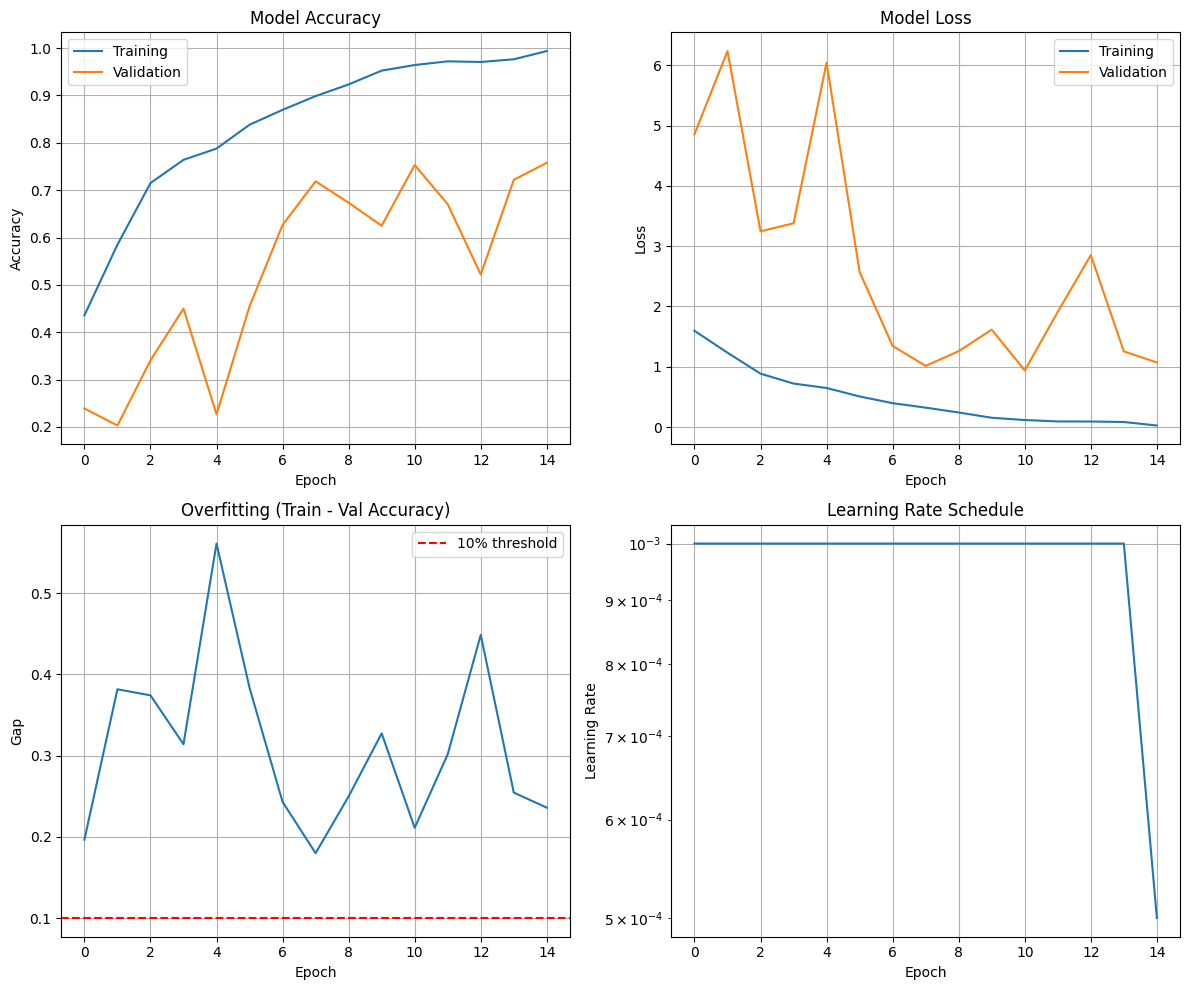


TRAINING SUMMARY
Best validation accuracy: 0.7578
Final validation accuracy: 0.7578
Final training accuracy: 0.9937
Overfitting gap: 0.2359


In [25]:
def analyze_results(history):
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Plot loss
    axes[0, 1].plot(history.history['loss'], label='Training')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Overfitting analysis
    overfitting = np.array(history.history['accuracy']) - np.array(history.history['val_accuracy'])
    axes[1, 0].plot(overfitting)
    axes[1, 0].axhline(y=0.1, color='r', linestyle='--', label='10% threshold')
    axes[1, 0].set_title('Overfitting (Train - Val Accuracy)')
    axes[1, 0].set_ylabel('Gap')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Learning rate
    if 'learning_rate' in history.history:
        axes[1, 1].semilogy(history.history['learning_rate'])
        axes[1, 1].set_title('Learning Rate Schedule')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*50)
    print("TRAINING SUMMARY")
    print("="*50)
    print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Overfitting gap: {history.history['accuracy'][-1] - history.history['val_accuracy'][-1]:.4f}")

# Run analysis
analyze_results(vgg16_history1)

In [69]:
y_test, y_pred, y_pred_probs = evaluate_model(vgg19_model,X_test,y_test,categories)

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step
Test Loss: 0.9312
Test Accuracy: 0.7719


<Figure size 1000x800 with 0 Axes>

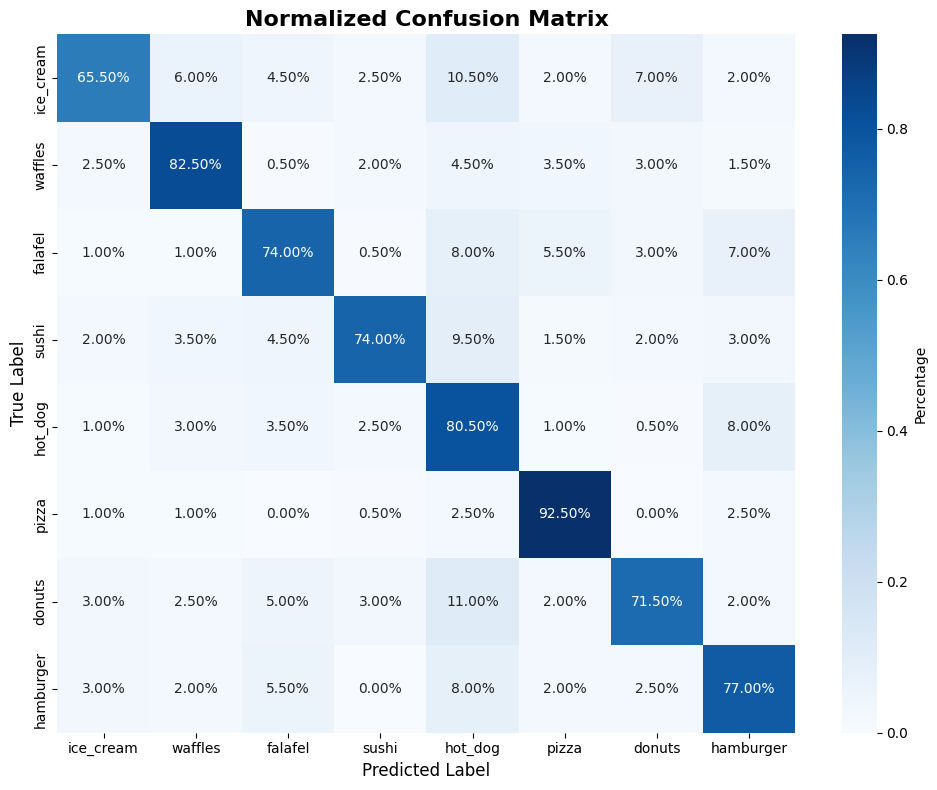

In [70]:
cm_vgg16_1 = plot_confusion_matrix(y_test,y_pred)


Classification Report:
              precision    recall  f1-score   support

   ice_cream       0.83      0.66      0.73       200
     waffles       0.81      0.82      0.82       200
     falafel       0.76      0.74      0.75       200
       sushi       0.87      0.74      0.80       200
     hot_dog       0.60      0.81      0.69       200
       pizza       0.84      0.93      0.88       200
      donuts       0.80      0.71      0.75       200
   hamburger       0.75      0.77      0.76       200

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



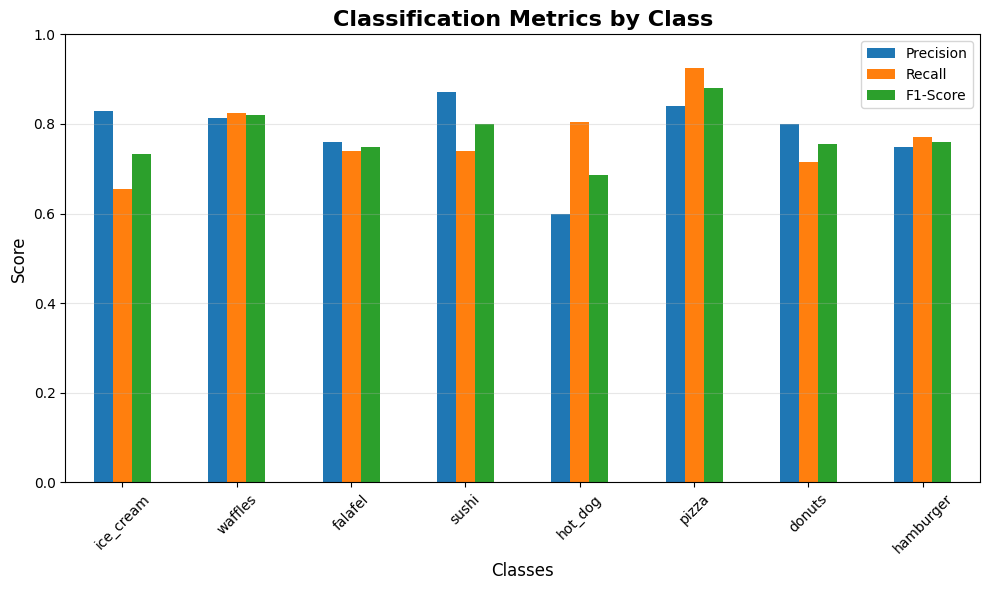

In [71]:
df_report_vgg16_1 = generate_classification_report(y_test,y_pred)

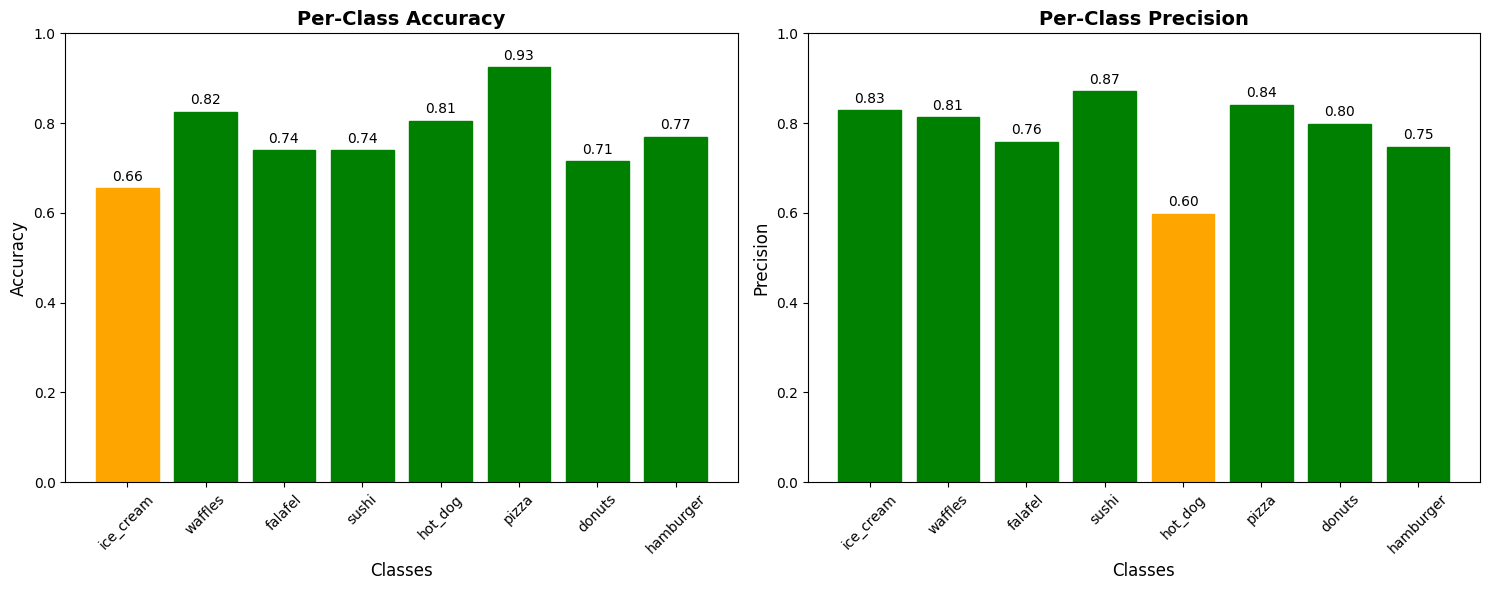

In [72]:
plot_per_class_metrics(cm_vgg16_1)

# vgg16_Model 2

In [28]:
vgg16_base2 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_base2.trainable = False

In [29]:
vgg16_model2 = Sequential([
    vgg16_base2,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


In [31]:
vgg16_model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Improved callbacks

In [32]:
callbacks2 = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_vgg16_model_v3.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [33]:
gc.collect()
tf.keras.backend.clear_session()
vgg16_history2 = vgg16_model2.fit(
    X_train,
    y_train,
    batch_size=32,
    validation_split = 0.1,
    epochs=15,
    callbacks=callbacks2
)

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.4655 - loss: 1.7642
Epoch 1: val_accuracy improved from -inf to 0.61563, saving model to best_vgg16_model_v3.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 44s 224ms/step - accuracy: 0.4659 - loss: 1.7625 - val_accuracy: 0.6156 - val_loss: 1.1933 - learning_rate: 5.0000e-04
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7785 - loss: 0.6622
Epoch 2: val_accuracy improved from 0.61563 to 0.64531, saving model to best_vgg16_model_v3.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.7784 - loss: 0.6623 - val_accuracy: 0.6453 - val_loss: 1.1764 - learning_rate: 5.0000e-04
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8837 - loss: 0.3843
Epoch 3: val_accuracy improved from 0.64531 to 0.67500, saving model to best_vgg16_model_v3.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.8837 - loss: 0.3844 - val_accuracy: 0.6750 - val_loss: 1.1027 - learning_rate: 5.0000e-04
Epoch 4/15

# Visualization and analysis

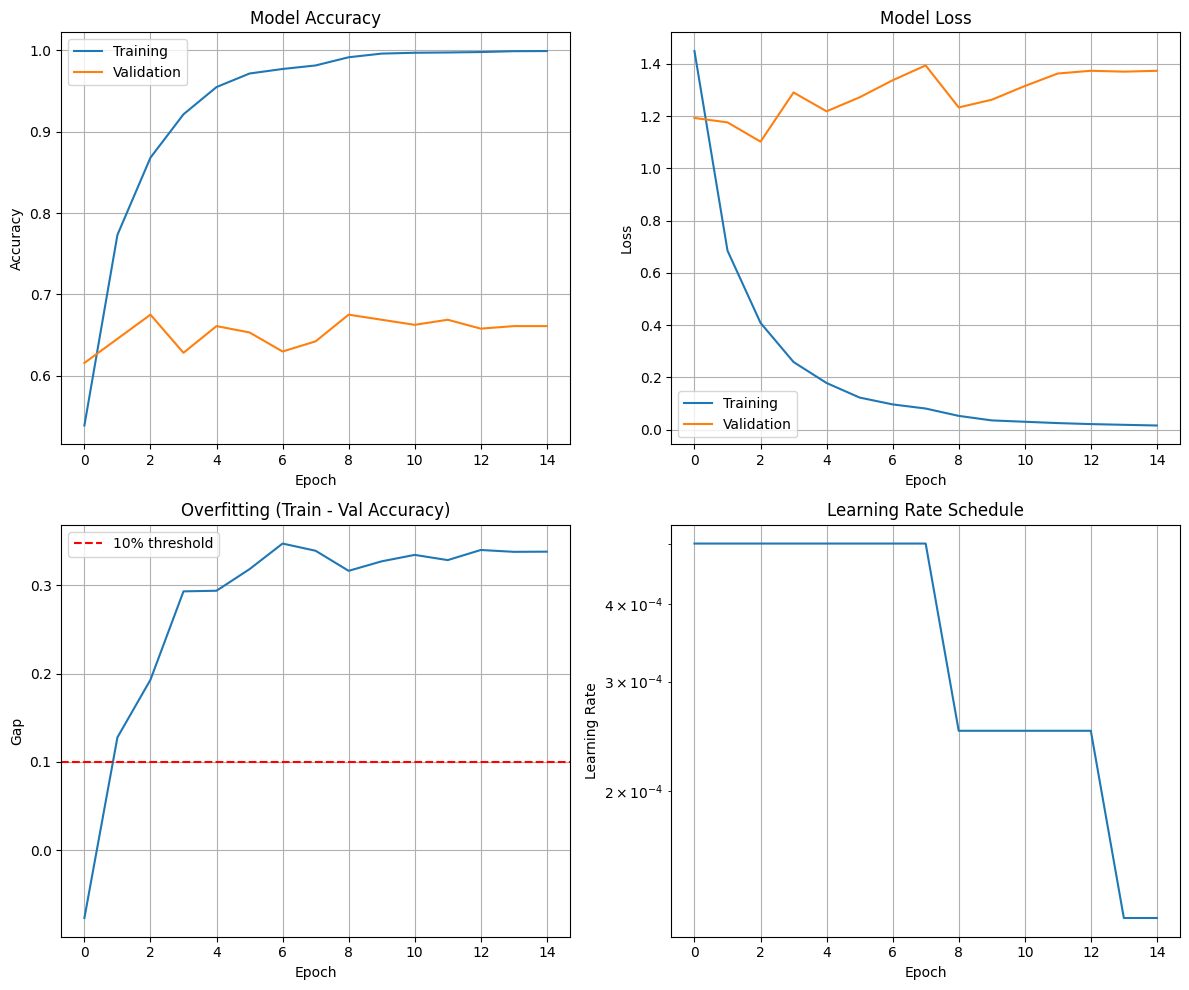


TRAINING SUMMARY
Best validation accuracy: 0.6750
Final validation accuracy: 0.6609
Final training accuracy: 0.9991
Overfitting gap: 0.3382


In [74]:
analyze_results(vgg16_history2)

In [73]:
y_test, y_pred, y_pred_probs = evaluate_model(vgg19_model,X_test,y_test,categories)

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step
Test Loss: 0.9312
Test Accuracy: 0.7719


<Figure size 1000x800 with 0 Axes>

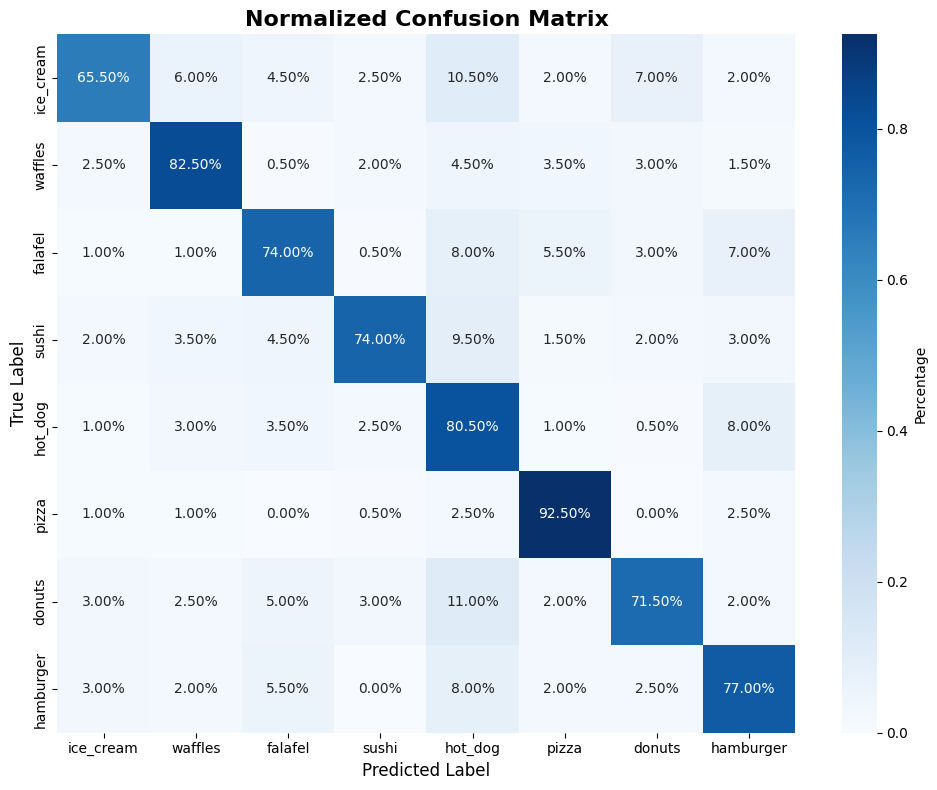

In [75]:
cm_vgg16_2 = plot_confusion_matrix(y_test,y_pred)


Classification Report:
              precision    recall  f1-score   support

   ice_cream       0.83      0.66      0.73       200
     waffles       0.81      0.82      0.82       200
     falafel       0.76      0.74      0.75       200
       sushi       0.87      0.74      0.80       200
     hot_dog       0.60      0.81      0.69       200
       pizza       0.84      0.93      0.88       200
      donuts       0.80      0.71      0.75       200
   hamburger       0.75      0.77      0.76       200

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



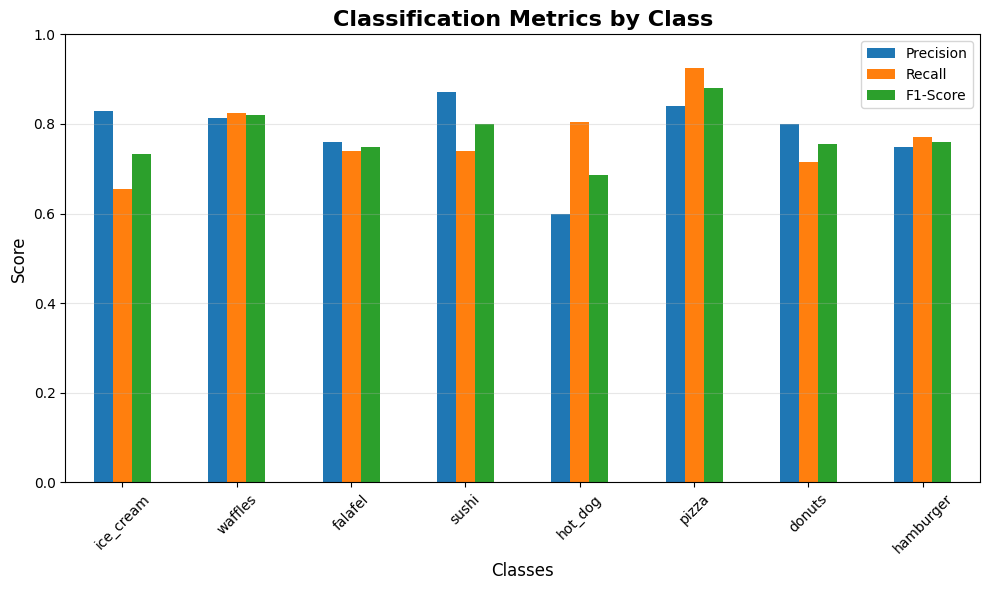

In [76]:
df_report_vgg16_2 = generate_classification_report(y_test,y_pred)

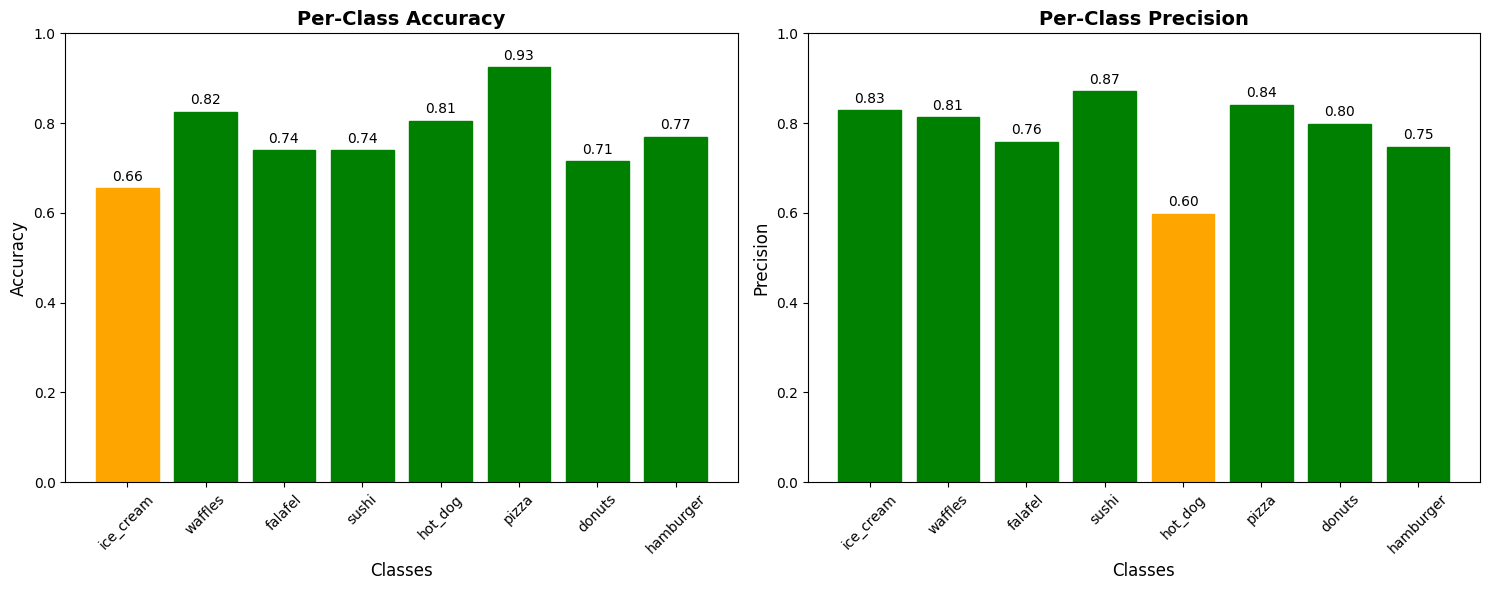

In [77]:
plot_per_class_metrics(cm_vgg16_2)

# VGG19 Model

In [38]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg19_base.layers[:-6]:  # Unfreeze last 6 layers
    layer.trainable = False

# Build the model

In [46]:
vgg19_model = Sequential([
    vgg19_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(8, activation='softmax')
])

In [47]:
vgg19_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback

In [48]:
callbacks_vgg19 = [
    # Early stopping with more patience for deeper model
    EarlyStopping(
        monitor='val_accuracy',  # Monitor accuracy instead of loss
        patience=20,  # More patience for VGG19
        restore_best_weights=True,
        mode='max',  # For accuracy, we want maximum
        verbose=1
    ),
    
    # Reduce LR with balanced settings
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,  # Slightly more patience than VGG16
        min_lr=1e-7,
        cooldown=2,  # Wait 2 epochs before reducing again
        verbose=1
    ),
    
    # Model checkpoint
    ModelCheckpoint(
        'best_vgg19_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

In [49]:
vgg19_model.compile(
    optimizer=Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08,
        clipnorm=1.0  # gradient clipping
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
vgg19_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,158,792 (76.90 MB)

 Trainable params: 9,573,128 (36.52 MB)

 Non-trainable params: 10,585,664 (40.38 MB)

In [51]:
gc.collect()
tf.keras.backend.clear_session()
history_phase1 = vgg19_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.1,
    callbacks=callbacks_vgg19,
    verbose=1
)

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.4321 - loss: 1.6709
Epoch 1: val_accuracy improved from -inf to 0.64219, saving model to best_vgg19_model.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 63s 312ms/step - accuracy: 0.4327 - loss: 1.6694 - val_accuracy: 0.6422 - val_loss: 1.1535 - learning_rate: 1.0000e-04
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7505 - loss: 0.7958
Epoch 2: val_accuracy did not improve from 0.64219
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 287ms/step - accuracy: 0.7504 - loss: 0.7960 - val_accuracy: 0.6359 - val_loss: 1.1094 - learning_rate: 1.0000e-04
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.8333 - loss: 0.5440
Epoch 3: val_accuracy improved from 0.64219 to 0.69844, saving model to best_vgg19_model.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 292ms/step - accuracy: 0.8333 - loss: 0.5440 - val_accuracy: 0.6984 - val_loss: 1.0386 - learning_rate: 1.0000e-04
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accu

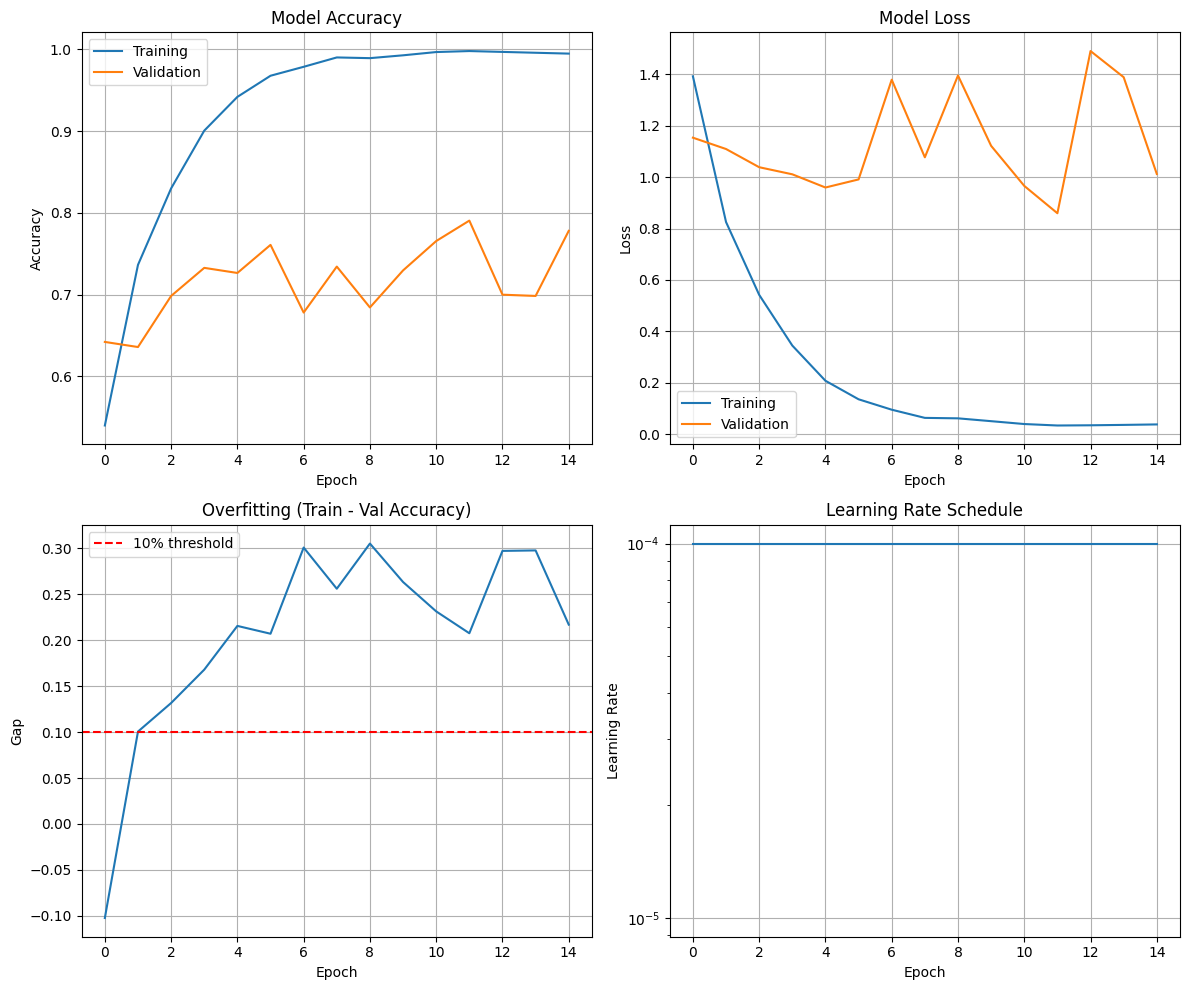


TRAINING SUMMARY
Best validation accuracy: 0.7906
Final validation accuracy: 0.7781
Final training accuracy: 0.9950
Overfitting gap: 0.2168


In [52]:
analyze_results(history_phase1)

In [60]:
y_test, y_pred, y_pred_probs = evaluate_model(vgg19_model,X_test,y_test,categories)

50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step
Test Loss: 0.9312
Test Accuracy: 0.7719


<Figure size 1000x800 with 0 Axes>

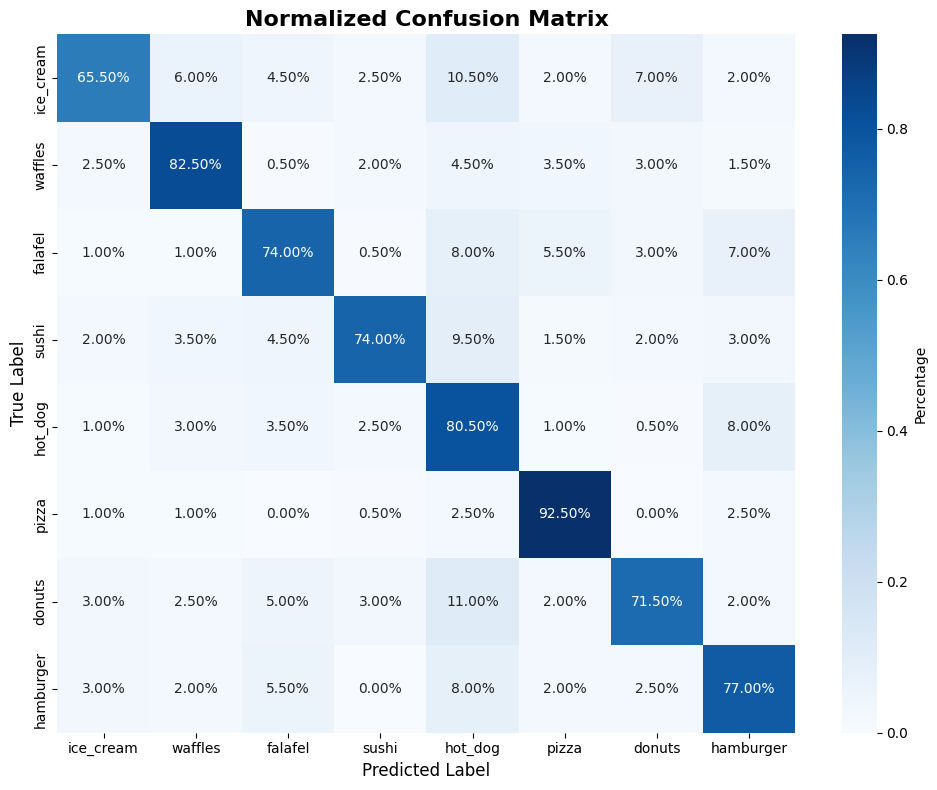

In [67]:
cm_vgg19 = plot_confusion_matrix(y_test,y_pred)


Classification Report:
              precision    recall  f1-score   support

   ice_cream       0.83      0.66      0.73       200
     waffles       0.81      0.82      0.82       200
     falafel       0.76      0.74      0.75       200
       sushi       0.87      0.74      0.80       200
     hot_dog       0.60      0.81      0.69       200
       pizza       0.84      0.93      0.88       200
      donuts       0.80      0.71      0.75       200
   hamburger       0.75      0.77      0.76       200

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



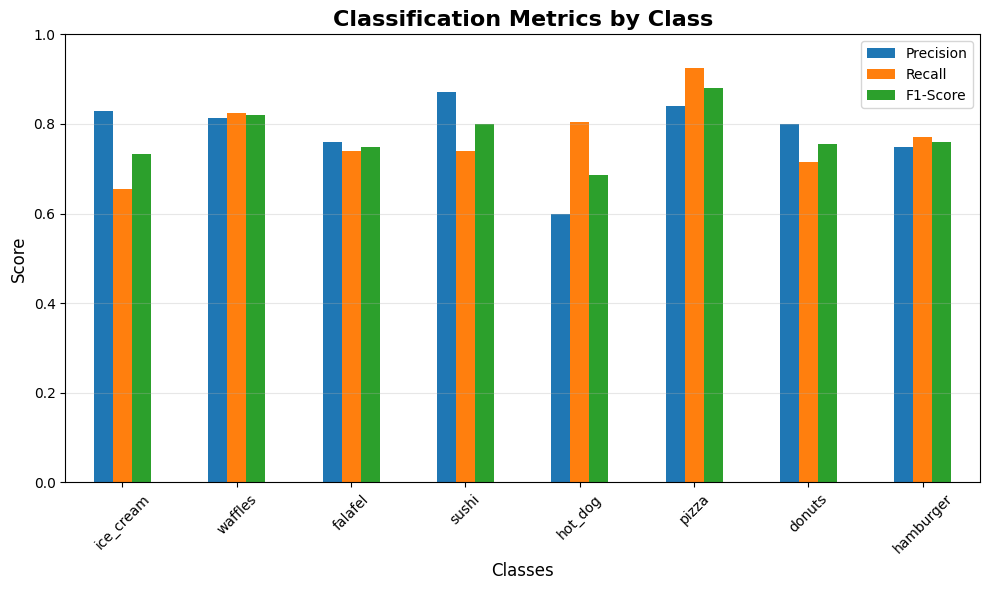

In [63]:
df_report_vgg19 = generate_classification_report(y_test,y_pred)

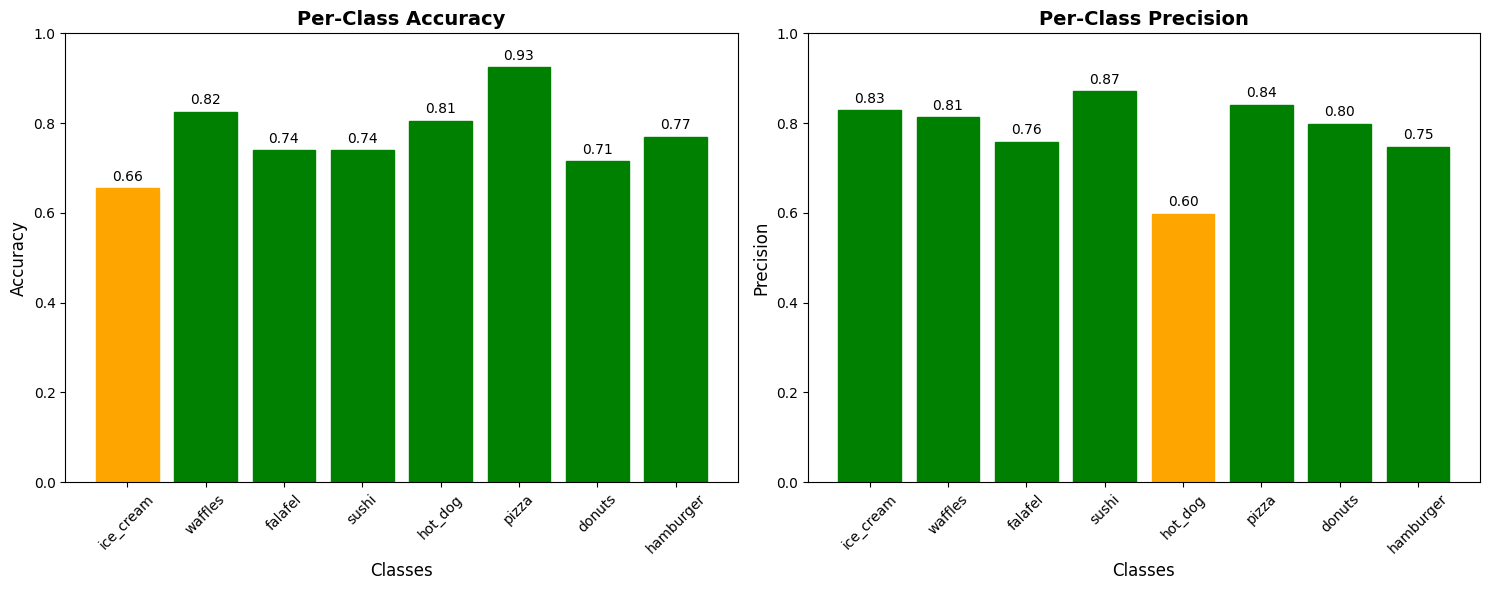

In [68]:
plot_per_class_metrics(cm_vgg19)